In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets

In [194]:
X, y = datasets.make_blobs(n_samples=1000, n_features=2, centers=2, random_state=42)

In [224]:
class SVM:
    def __init__(self, learning_rate=0.01, lambda_parameter=0.01):
        self.lr = learning_rate
        self.lambda_parameter = lambda_parameter
        self.weights = None 
        self.hinge_loss = lambda z: 0 if z<=0 else z

    def fit(self, X, y, n_iters=10):
        self.loss = dict()
        y_ = np.where(y<=0, -1, 1)
        X = np.c_[X, np.ones(X.shape[0])*-1]
        self.weights = np.random.randn(X.shape[1])
        linear_pred = np.dot(X, self.weights.T)

        for epoch in range(n_iters):
            penalty = 0 
            for idx, x_i in enumerate(X):
                condition = (y_[idx] * np.dot(x_i, self.weights)) >= 1

                if condition:
                    #if the data point is classified correctly, only focus on maximizing the margin.
                    #take upto the second last element of the weight matrix because the bias is not differenciated 
                    dl_dw = 2 * self.lambda_parameter * self.weights[:-1]
                    self.weights[:-1] -= self.lr * dl_dw
                    

                else:
                    dl_dw_1 = 2 * self.lambda_parameter * self.weights[:-1]
                    dl_dw_2 = -y_[idx] * (x_i )
                    
                    self.weights[:-1] -= self.lr * dl_dw_1
                    self.weights -= self.lr * dl_dw_2

                    penalty += self.hinge_loss(1-y_[idx]*(np.dot(x_i, self.weights.T)))
            
                    
            self.loss[epoch] = round((self.lambda_parameter * np.sum(self.weights **2) + penalty), 5)
            print(f"epoch {epoch + 1} / {n_iters}\t loss: {self.loss[epoch]}")

    def predict(self, X):
        X = np.c_[X, np.ones(X.shape[0])*1]
        linear_pred = np.dot(X, self.weights.T)
        return np.sign(linear_pred)
        


In [247]:
def visualize_svm(X, weights_and_bias):
    def get_hyperplane_value(x, weights_and_bias, offset):
        bias = weights_and_bias[2]
        return (-weights_and_bias[0] * x + bias + offset ) / weights_and_bias[1]
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane_value(x0_1, weights_and_bias, 0)
    x1_2 = get_hyperplane_value(x0_2, weights_and_bias, 0)

    x1_1_m = get_hyperplane_value(x0_1, weights_and_bias, -1)
    x1_2_m = get_hyperplane_value(x0_2, weights_and_bias, -1)

    x1_1_p = get_hyperplane_value(x0_1, weights_and_bias, 1)
    x1_2_p = get_hyperplane_value(x0_2, weights_and_bias, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'k')

    x1_min = np.min(X[:, 1])
    x1_max = np.max(X[:, 1])

    ax.set_ylim([x1_min-3, x1_max+3])

    plt.show()

In [262]:
svm = SVM(learning_rate=0.001,lambda_parameter=0.01)
svm.fit(X, y, n_iters=1000)

epoch 1 / 1000	 loss: 243.97909
epoch 2 / 1000	 loss: 8.46499
epoch 3 / 1000	 loss: 5.71629
epoch 4 / 1000	 loss: 4.60616
epoch 5 / 1000	 loss: 3.9929
epoch 6 / 1000	 loss: 3.60725
epoch 7 / 1000	 loss: 3.12777
epoch 8 / 1000	 loss: 2.96972
epoch 9 / 1000	 loss: 2.76022
epoch 10 / 1000	 loss: 2.55362
epoch 11 / 1000	 loss: 2.3449
epoch 12 / 1000	 loss: 2.1673
epoch 13 / 1000	 loss: 2.12858
epoch 14 / 1000	 loss: 2.06093
epoch 15 / 1000	 loss: 1.97355
epoch 16 / 1000	 loss: 1.95609
epoch 17 / 1000	 loss: 1.88964
epoch 18 / 1000	 loss: 1.81288
epoch 19 / 1000	 loss: 1.82156
epoch 20 / 1000	 loss: 1.78351
epoch 21 / 1000	 loss: 1.76285
epoch 22 / 1000	 loss: 1.76647
epoch 23 / 1000	 loss: 1.72516
epoch 24 / 1000	 loss: 1.68408
epoch 25 / 1000	 loss: 1.69187
epoch 26 / 1000	 loss: 1.69463
epoch 27 / 1000	 loss: 1.65248
epoch 28 / 1000	 loss: 1.65923
epoch 29 / 1000	 loss: 1.66097
epoch 30 / 1000	 loss: 1.61782
epoch 31 / 1000	 loss: 1.62357
epoch 32 / 1000	 loss: 1.57361
epoch 33 / 1000	 l

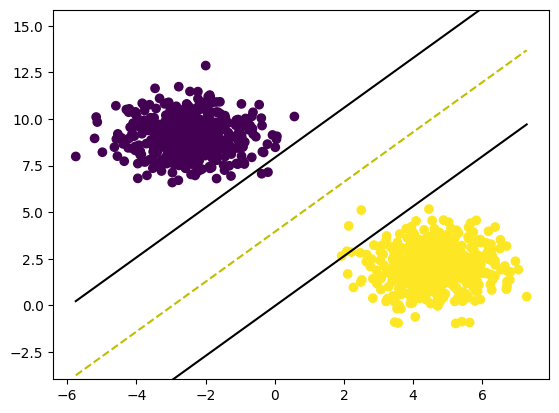

In [263]:
visualize_svm(X, svm.weights)